In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [17]:
def p(nt, nb, nl, eb, em):
    # nt = ntb + ntl
    return sum(
        [sp.stats.binom.pmf(ntb, nb, eb) * sp.stats.binom.pmf(nt-ntb, nl, em)
         for ntb in range(0, nb+1)
        ])

eb = 0.68
em = 0.01
nb = 4
nl = 2

for nt in range(2, 6+1):
    print(nt, p(nt, nb, nl, eb, em))

2 0.28021080063999987
3 0.4000978124800001
4 0.21755624064000004
5 0.004273759744000002
6 2.138137600000001e-05


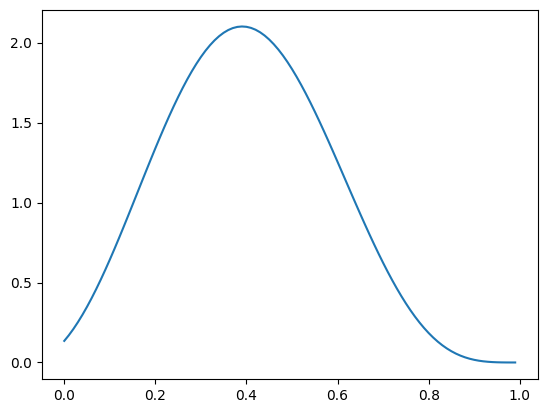

In [110]:
def pdf_eb(nt, nb, nl, em):
    norm = sp.integrate.quad(lambda eb: p(nt, nb, nl, eb, em), 0, 1)
    def pdf(eb):
        return p(nt, nb, nl, eb, em) / norm[0]
    return pdf

nb = 8
nl = 100
nt = 4

eb = np.arange(0, 1, 1e-2)

pdf = pdf_eb(nt, nb, nl, em)

plt.plot(eb, pdf(eb))


In [111]:
sp.integrate.quad(pdf, 0, 1)

(0.9999999999999999, 1.1102230246251564e-14)

In [112]:
pdf_max = sp.optimize.fmin(lambda eb: -pdf(eb), 0.5)

Optimization terminated successfully.
         Current function value: -2.100930
         Iterations: 12
         Function evaluations: 24


In [114]:
lo = sp.optimize.minimize(lambda eb: np.abs(sp.integrate.quad(pdf, 0, eb)[0] - 0.05), 0.9, bounds=[(0, 1)]).x
hi = sp.optimize.minimize(lambda eb: np.abs(sp.integrate.quad(pdf, eb, 1)[0] - 0.05), 0.1, bounds=[(0, 1)]).x
lo, pdf_max, hi

(array([0.11949133]), array([0.390625]), array([0.69451987]))

In [115]:
sp.integrate.quad(pdf, 0, lo)

(0.049999997338535926, 5.551114827643914e-16)

In [116]:
sp.integrate.quad(pdf, hi, 1)

(0.05000000327285979, 5.551115486486212e-16)

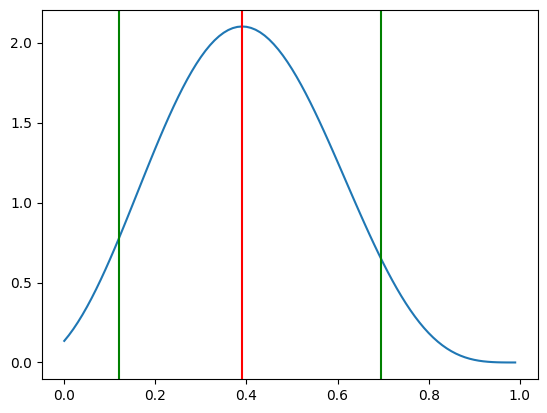

In [117]:
plt.plot(eb, pdf(eb))
plt.axvline(pdf_max, color='r')
plt.axvline(lo, color='g')
plt.axvline(hi, color='g')